In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
def show_image(image_vec):
    plt.figure()
    plt.imshow(image_vec)
    plt.colorbar()
    plt.grid(False)
    plt.show()

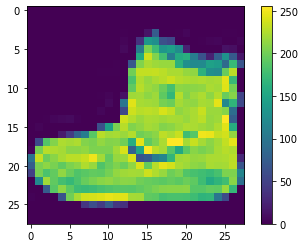

In [7]:
show_image(train_images[0])

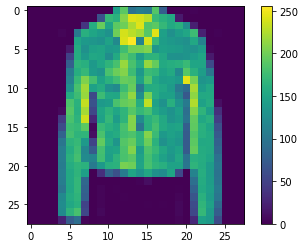

In [8]:
show_image(test_images[10])

In [9]:
train_images, test_images = train_images / 255.0, test_images / 255.0

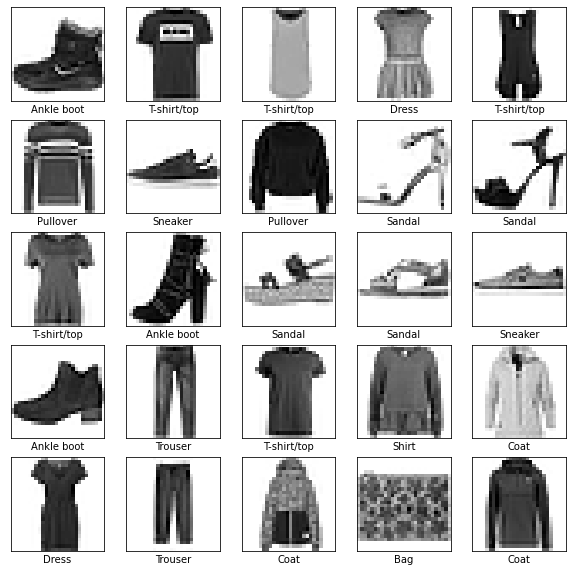

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])

2021-12-15 14:17:26.871326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-15 14:17:26.871531: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [12]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [13]:
model.compile(
    optimizer='adam',
    loss= loss_fn,
    metrics=['accuracy']
)

In [14]:
model.fit(train_images, train_labels, epochs=10)

2021-12-15 14:17:35.832656: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-15 14:17:35.987656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5005 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3742 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3092 - accuracy: 0.8873
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2921 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2782 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2655 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2532 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2450 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_loss, test_acc

2021-12-15 14:18:47.759365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3286 - accuracy: 0.8838 - 915ms/epoch - 3ms/step


(0.32860034704208374, 0.8838000297546387)

In [16]:
probility_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [17]:
#predictions = probility_model.predict(test_images)
predictions = probility_model(test_images)

In [18]:
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9.2701964e-07, 6.0730138e-10, 1.3154660e-08, 3.4225819e-12,
       5.4708624e-09, 4.5875250e-03, 7.8622620e-08, 1.5359039e-02,
       2.2500267e-08, 9.8005247e-01], dtype=float32)>

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

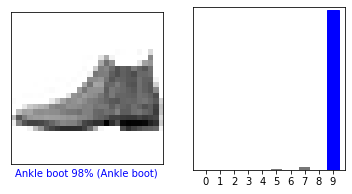

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

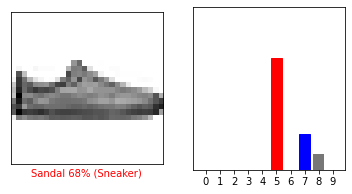

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

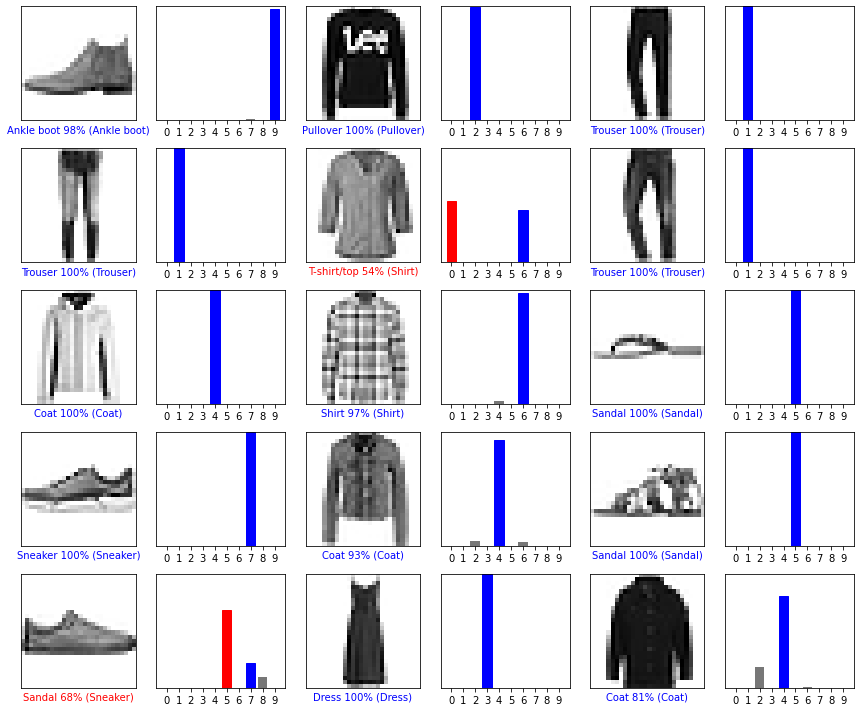

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()